In [35]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm
#import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib as mpl
from scipy import stats
from utils import plot_series

In [36]:
os.chdir('C:\\Users\\loren\\OneDrive\\Desktop\\PhD\\Progetto\\python\\')
path = 'data'

In [37]:
df = pd.read_csv(os.path.join(path, "sample_df.csv"))

In [38]:
df['Time'] = pd.to_datetime(df['Time'], format="%Y-%m")
#df['Time'] = df['Time'].dt.strftime('%Y-%m')

In [39]:
df = df.rename(columns={"OBS_VALUE": "IP"})

In [40]:
df['IP_t1'] = df.IP.shift(1)

In [41]:
df.IP_t1 = df.IP_t1.fillna(value=92.1)
df.to_csv(os.path.join(path, "ue27_df.csv"))

In [42]:
df.set_index('Time', inplace=True)

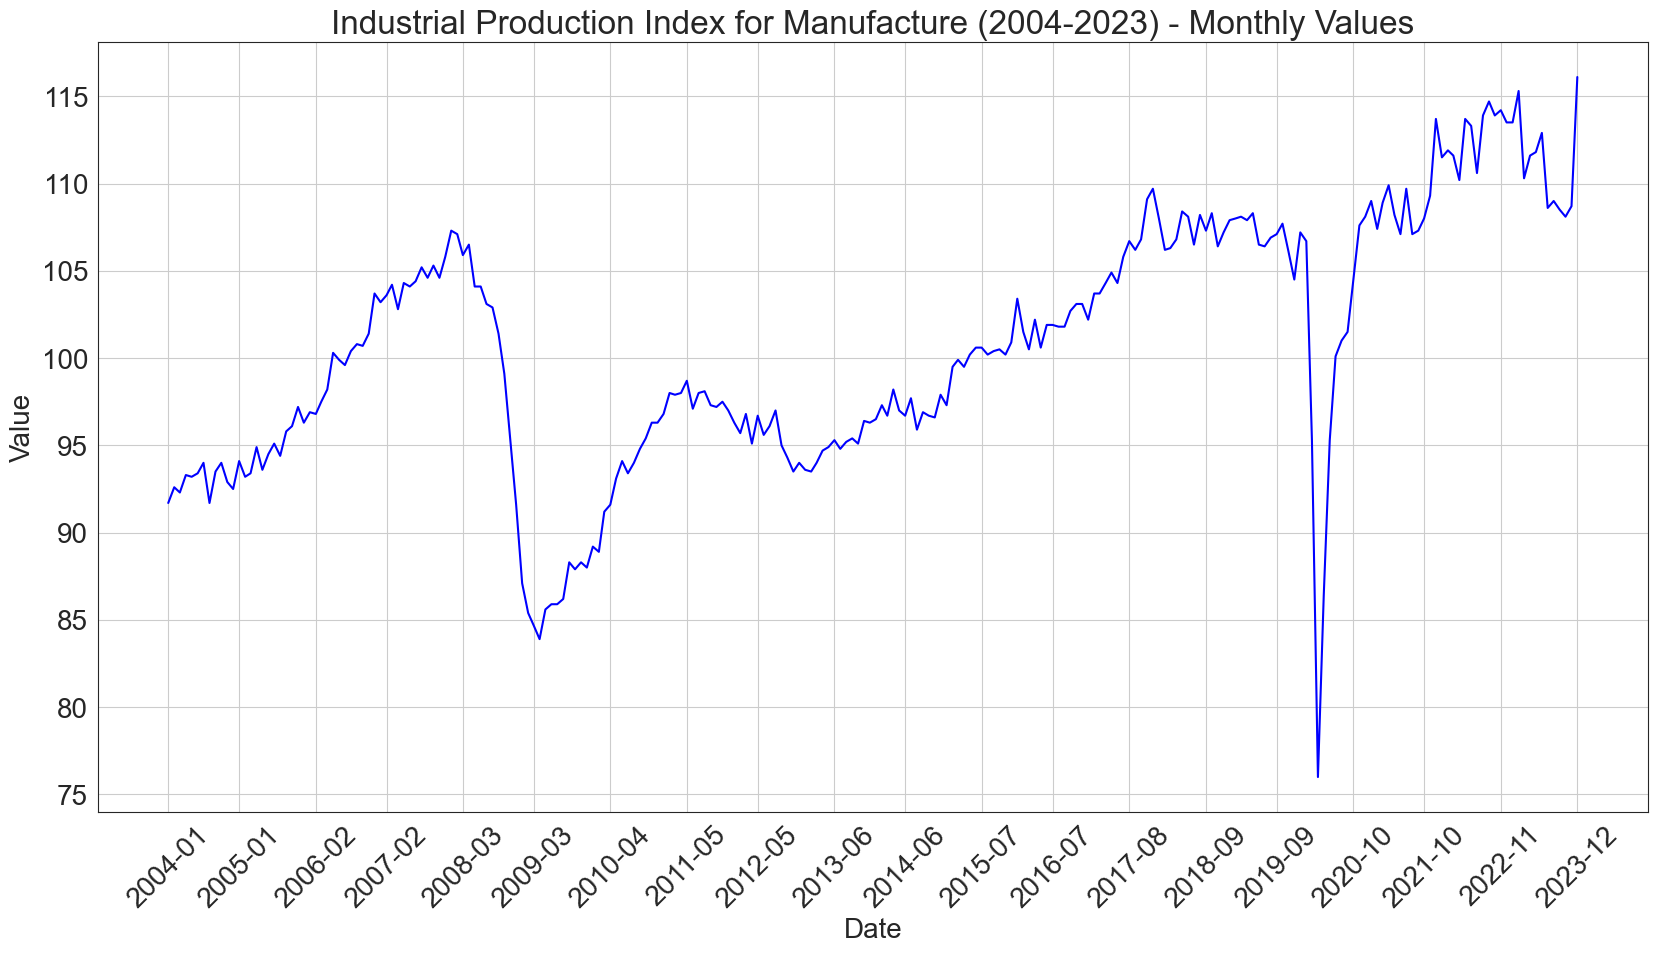

In [43]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df.index, df['IP'], label = 'IP Value', color = 'Blue')
# Set custom x-ticks to show fewer labels
tick_indices = np.linspace(0, len(df.index)-1, 20, dtype=int)  # 10 labels
ax.set_xticks(df.index[tick_indices])
ax.set_xticklabels(df.index[tick_indices].strftime('%Y-%m'), rotation=45)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Industrial Production Index for Manufacture (2004-2023) - Monthly Values')
plt.grid(True)
plt.show()

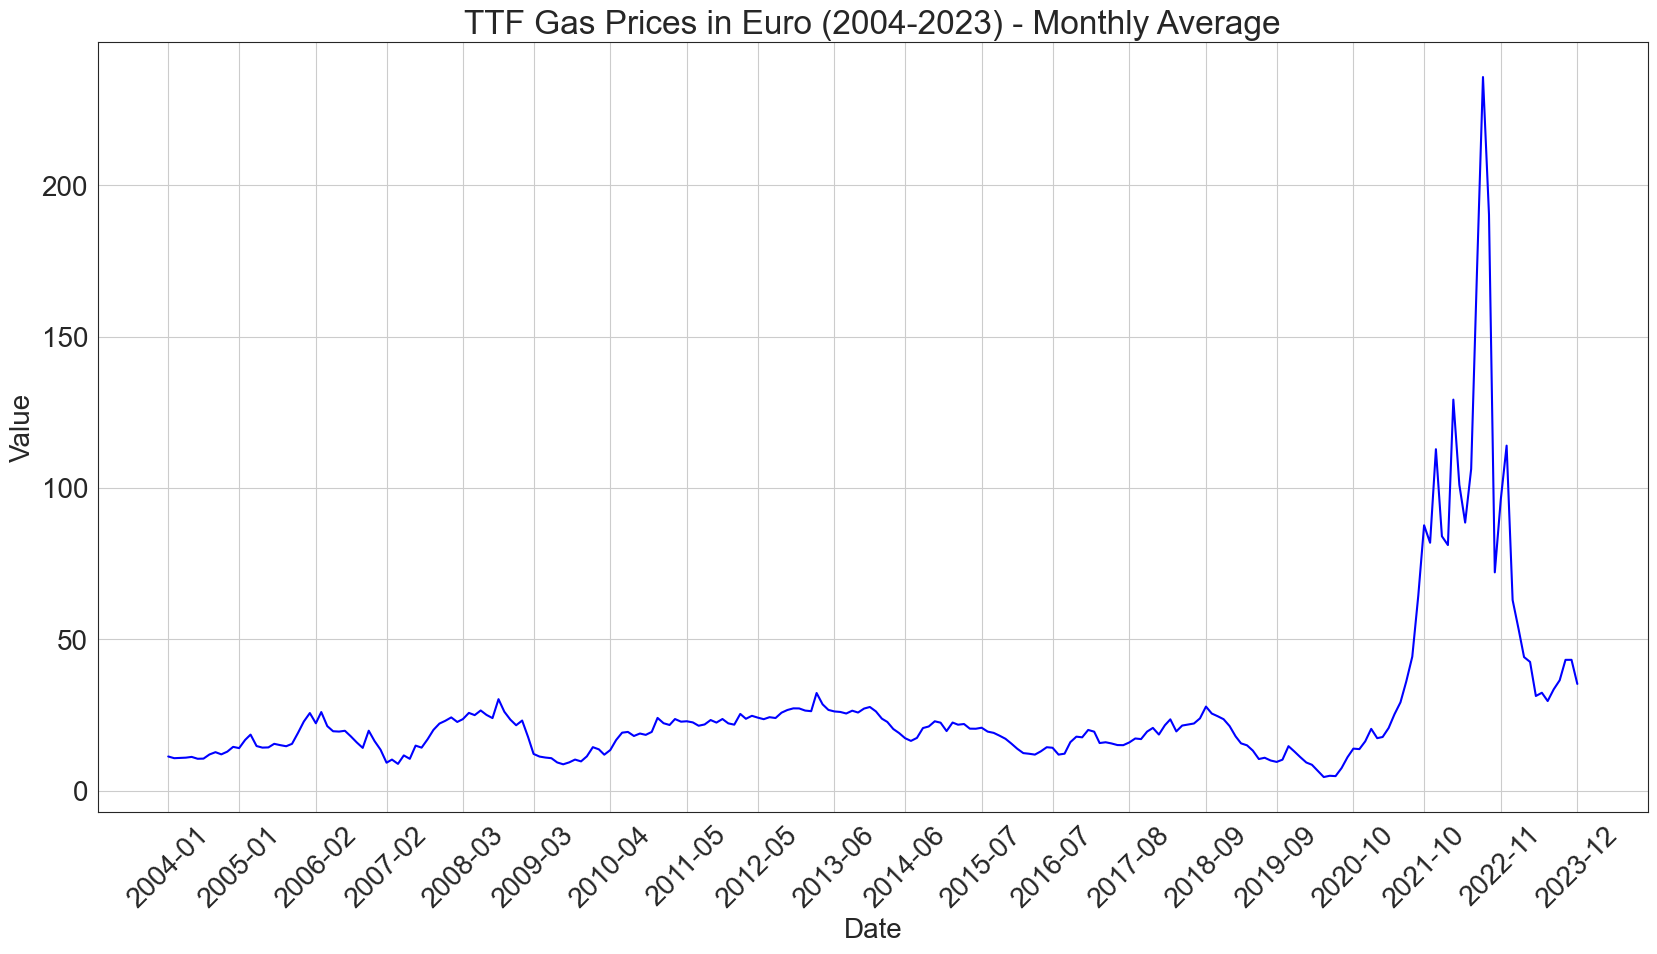

In [44]:
fig, ax = plt.subplots(figsize=(20, 10))
#ax.plot(df.index, df['OBS_VALUE'], label = 'IP Value', color = 'Blue')
ax.plot(df.index, df['GAS_PRICE'], label = 'Gas Price', color = 'Blue')

# Set custom x-ticks to show fewer labels
tick_indices = np.linspace(0, len(df.index)-1, 20, dtype=int)  # 10 labels
ax.set_xticks(df.index[tick_indices])
ax.set_xticklabels(df.index[tick_indices].strftime('%Y-%m'), rotation=45)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('TTF Gas Prices in Euro (2004-2023) - Monthly Average')
plt.grid(True)
plt.show()

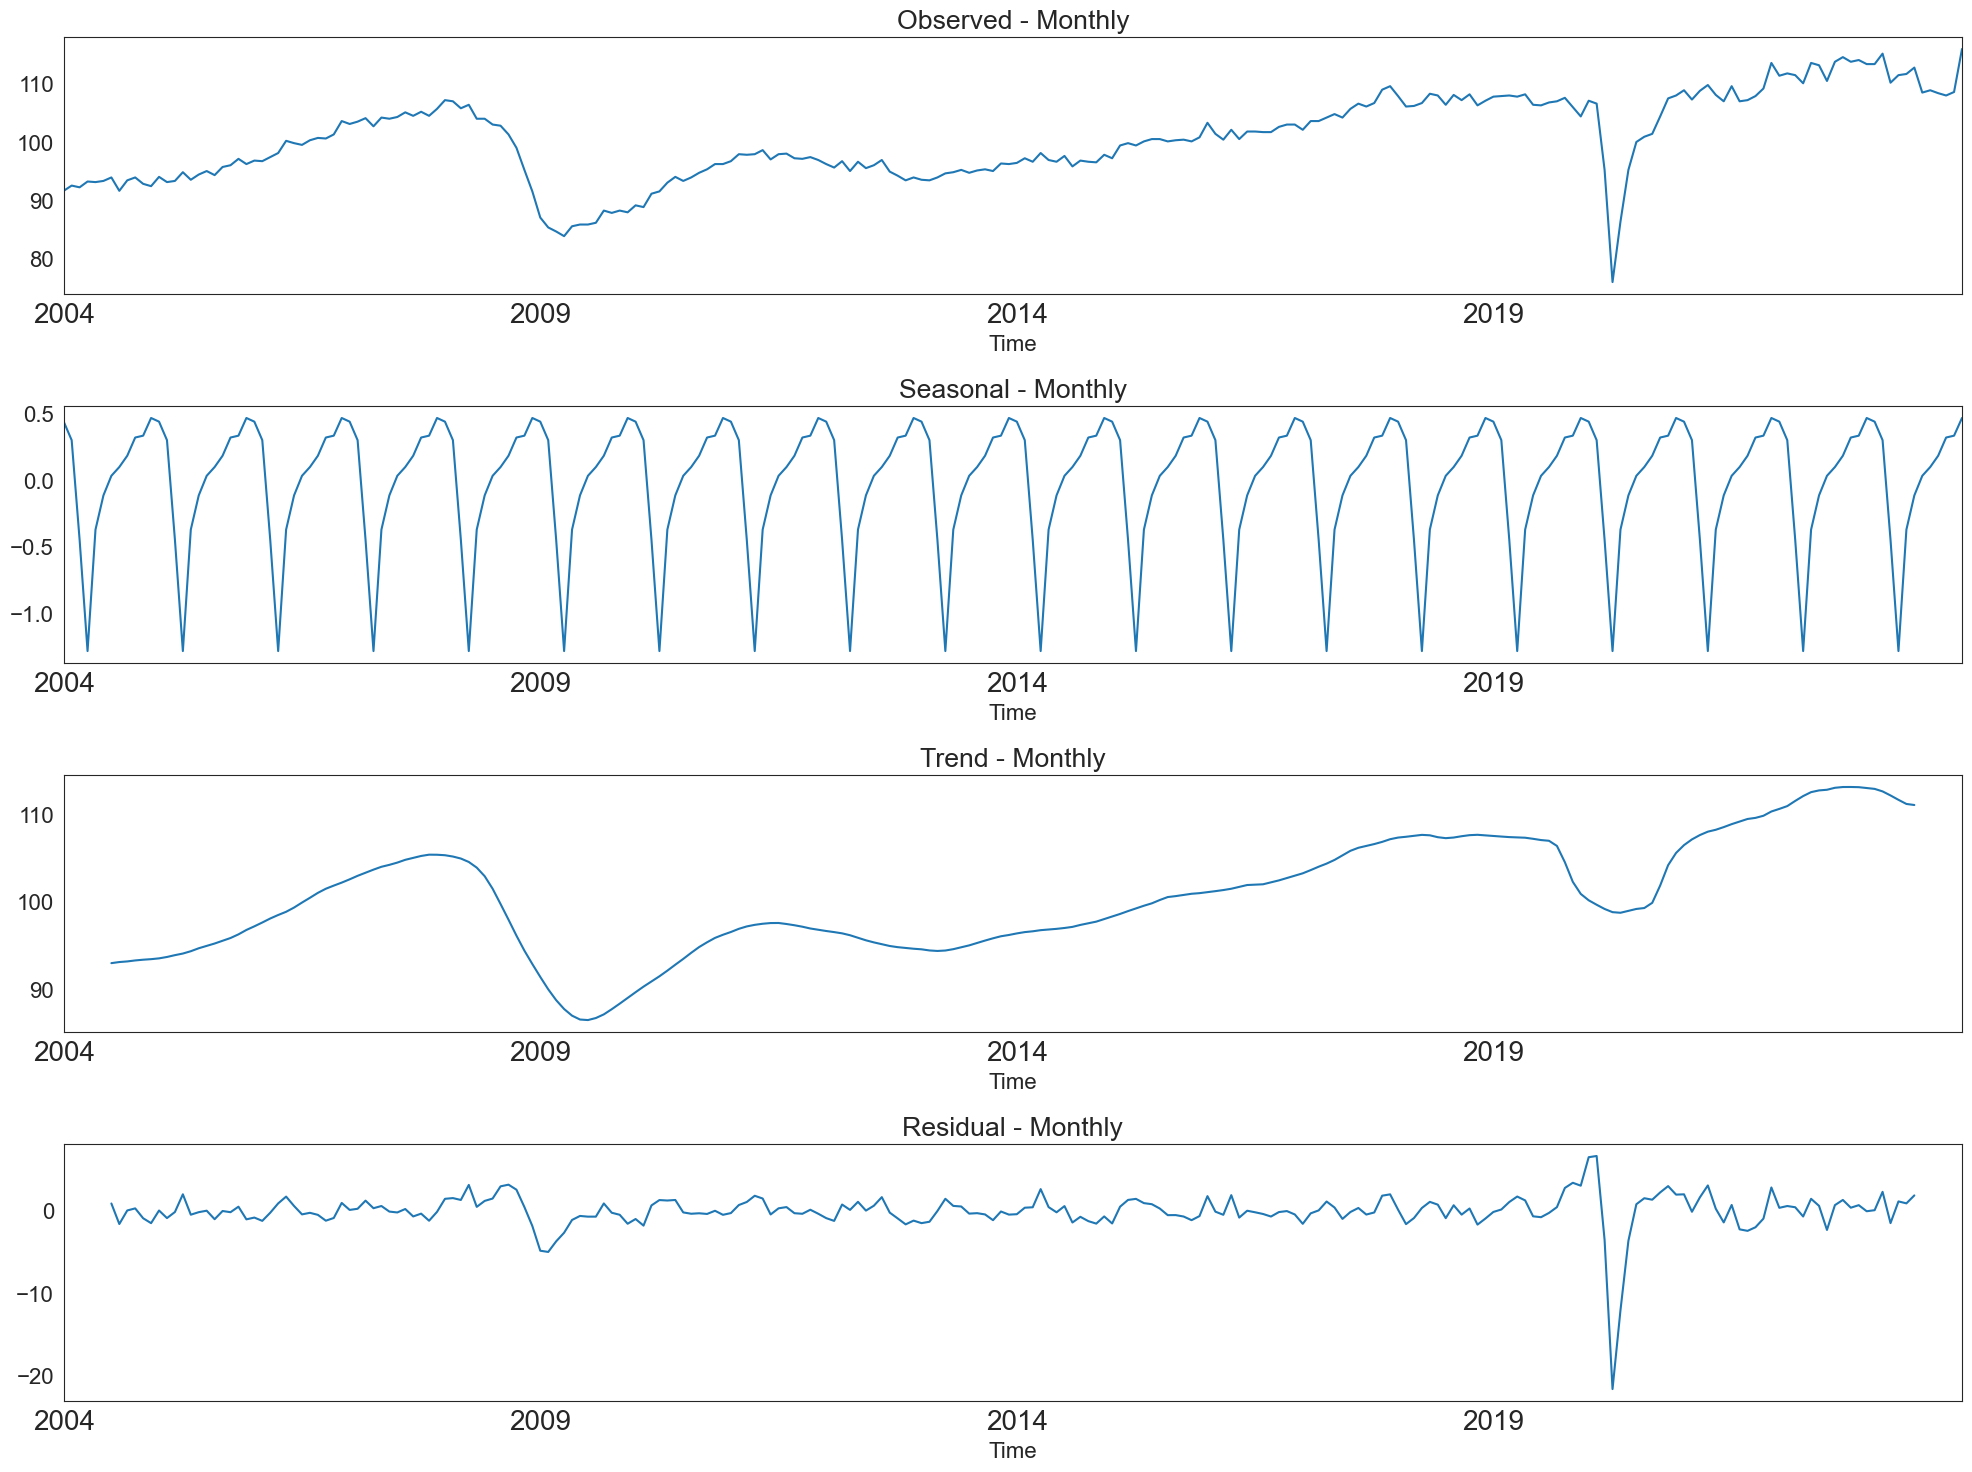

In [45]:
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 16

# Set the global background color to be white
mpl.rcParams['figure.facecolor'] = 'white'
mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['savefig.facecolor'] = 'white'

res1 = sm.tsa.seasonal_decompose(df['IP'], model='additive', period=12)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 15))
res1.observed.plot(ax=ax1, title='Observed - Monthly')
res1.seasonal.plot(ax=ax2, title='Seasonal - Monthly')
res1.trend.plot(ax=ax3, title='Trend - Monthly')
res1.resid.plot(ax=ax4, title='Residual - Monthly')
plt.tight_layout()
plt.show()

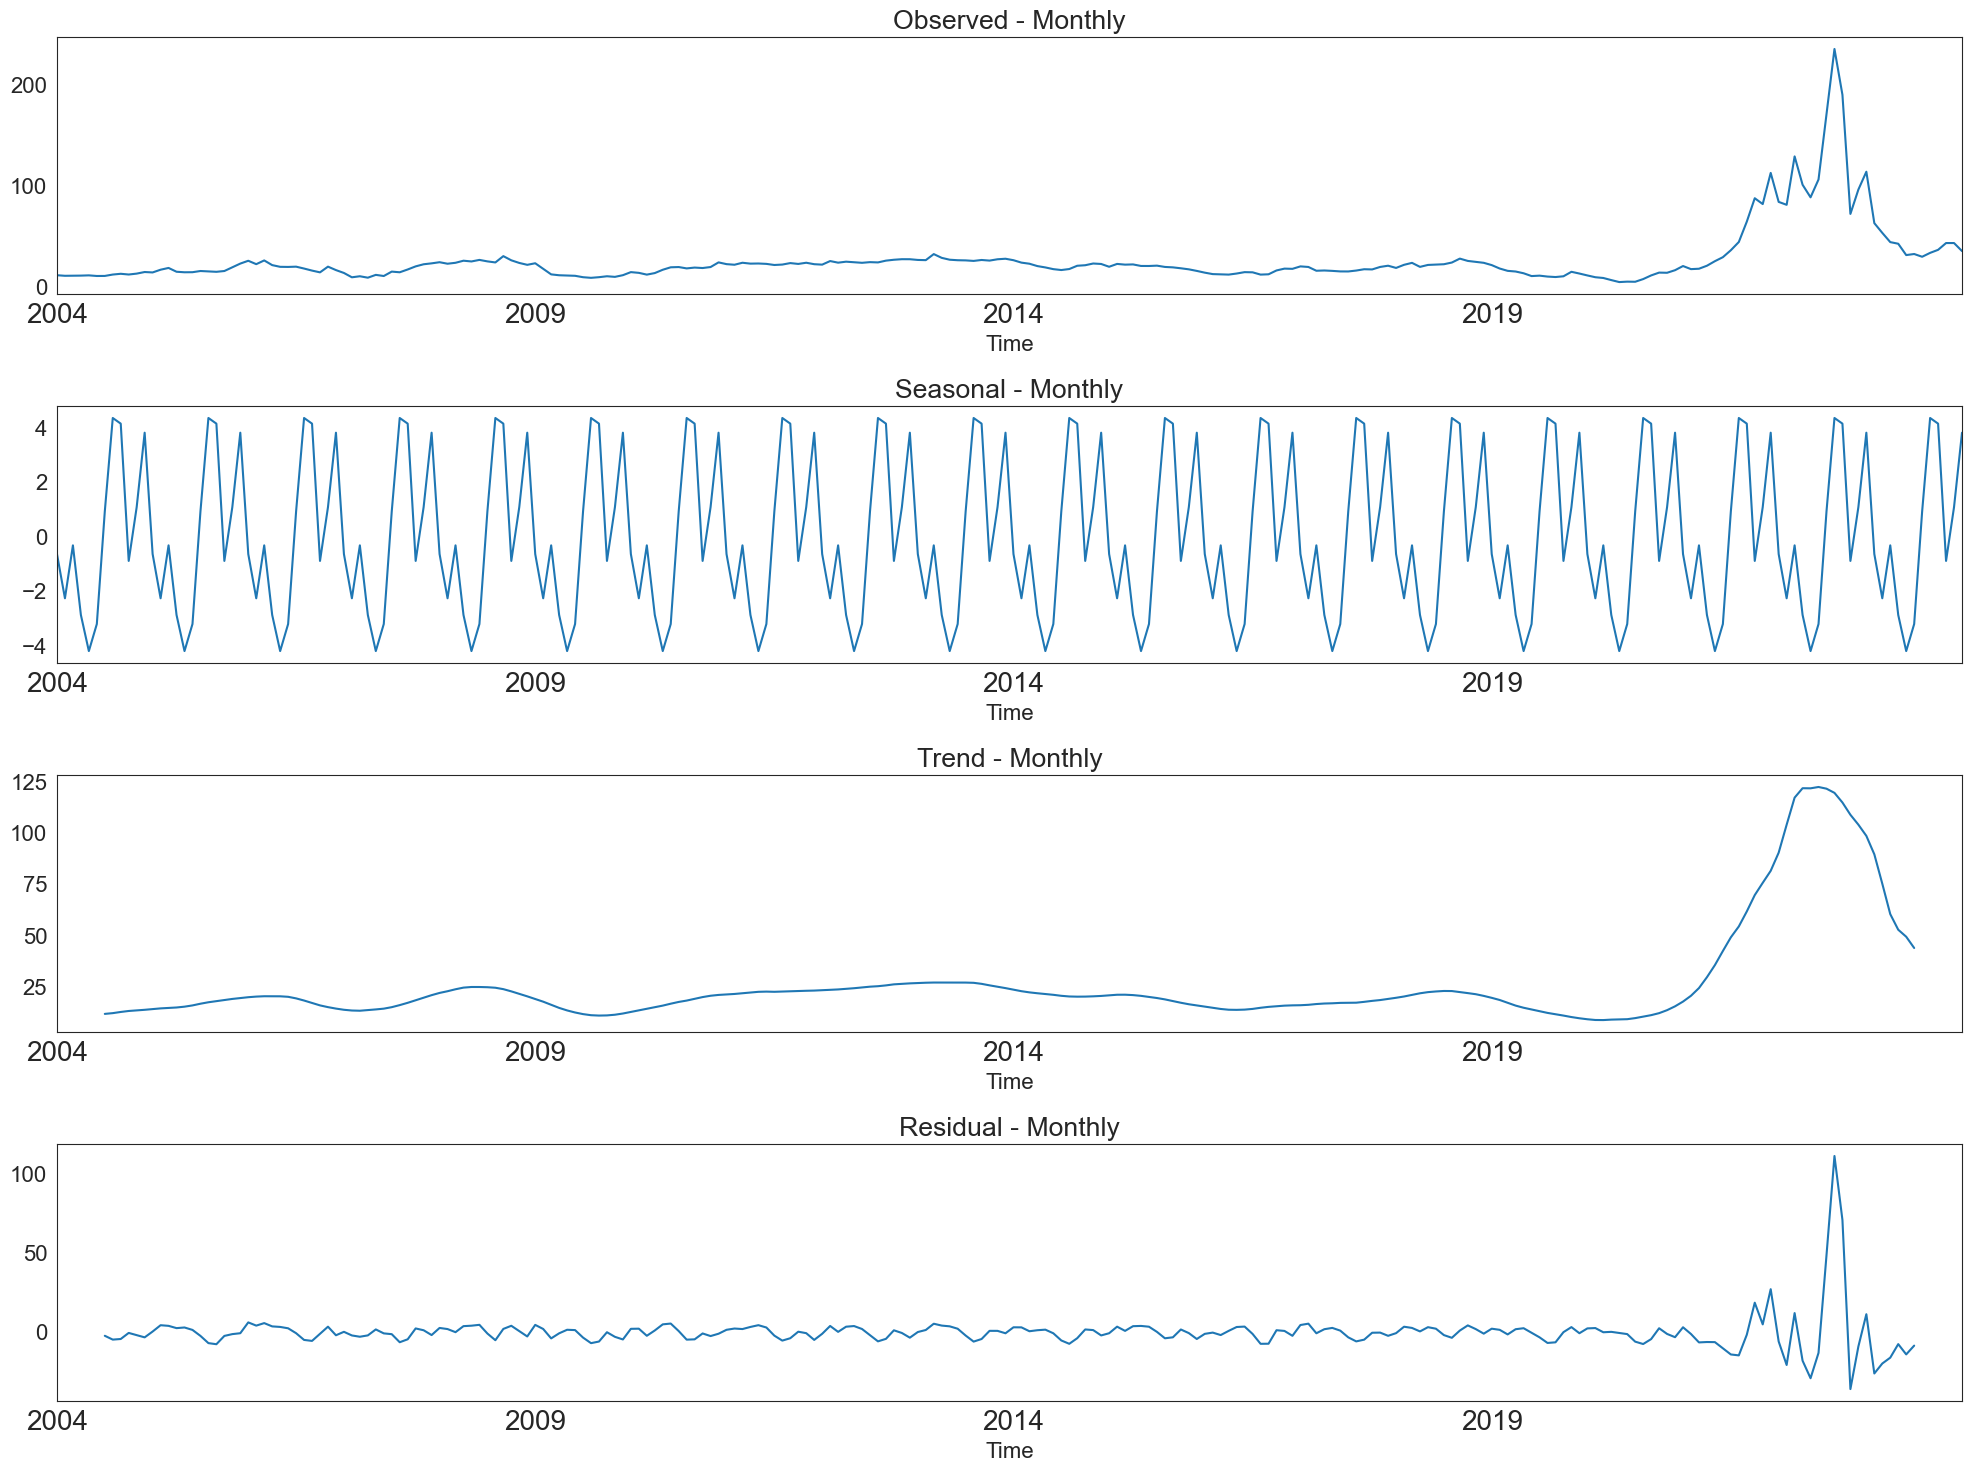

In [46]:
res2 = sm.tsa.seasonal_decompose(df['GAS_PRICE'], model='additive', period=12)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 15))
res2.observed.plot(ax=ax1, title='Observed - Monthly')
res2.seasonal.plot(ax=ax2, title='Seasonal - Monthly')
res2.trend.plot(ax=ax3, title='Trend - Monthly')
res2.resid.plot(ax=ax4, title='Residual - Monthly')
plt.tight_layout()
plt.show()

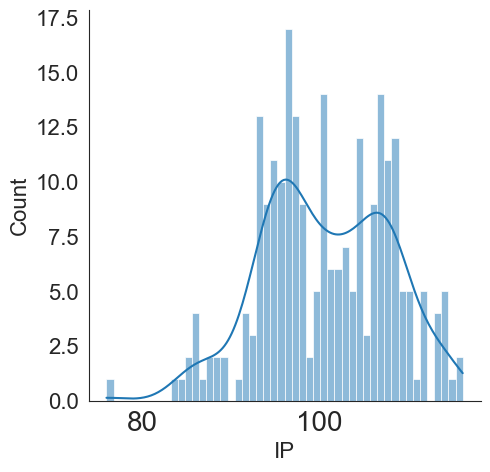

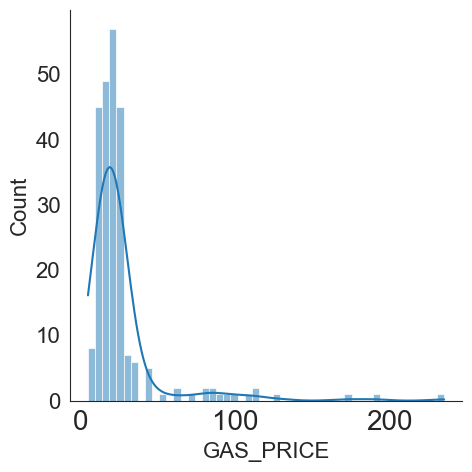

In [47]:
sns.displot(df, x="IP", bins = 50, kde= True)
sns.displot(df, x="GAS_PRICE", bins = 50, kde= True)

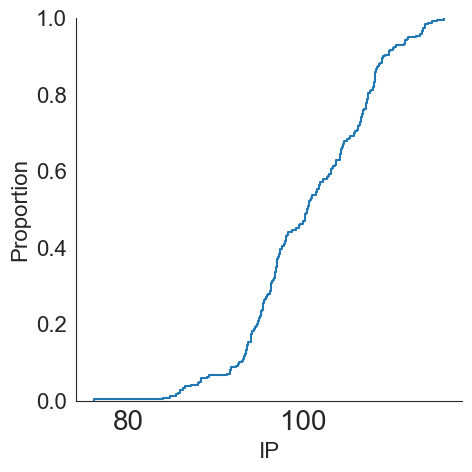

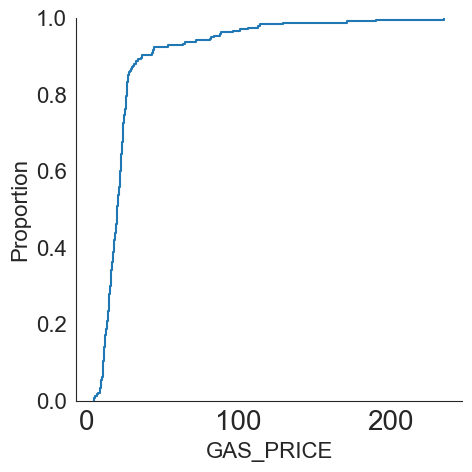

In [48]:
sns.displot(df, x="IP", kind="ecdf")
sns.displot(df, x="GAS_PRICE", kind="ecdf")

In [49]:
shapiro_ip = stats.shapiro(df.IP)
print(shapiro_ip.statistic, shapiro_ip.pvalue)

0.9820492276568733 0.003936813502513107


In [50]:
shapiro_gp = stats.shapiro(df.GAS_PRICE)
print(shapiro_gp.statistic, shapiro_gp.pvalue)

0.5003656713560726 1.51707562653176e-25


In [51]:
corr1 = stats.pearsonr(df.IP, df.GAS_PRICE)
print(corr1.correlation)
print(corr1.pvalue)
#print(corr.confidence_interval)


0.47161802228369726
1.0762682417224782e-14


In [52]:
corr2 = stats.pearsonr(df.IP, df.IP_t1)
print(corr2.correlation)
print(corr2.pvalue)

0.9524443208536406
7.945390377822594e-125


In [53]:
# Set the global font to be Times New Roman, size 20 (or any other size you want)
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 20

# Increase the size of year numbers on the plots
mpl.rcParams['xtick.labelsize'] = 20

# Set the background style to white
sns.set_style("white")

rolling_ip_q = df['IP'].rolling(3, center=True).mean()
rolling_ip_y = df['IP'].rolling(12, center=True).mean()

rolling_gp_q = df['GAS_PRICE'].rolling(3, center=True).mean()
rolling_gp_y = df['GAS_PRICE'].rolling(12, center=True).mean()

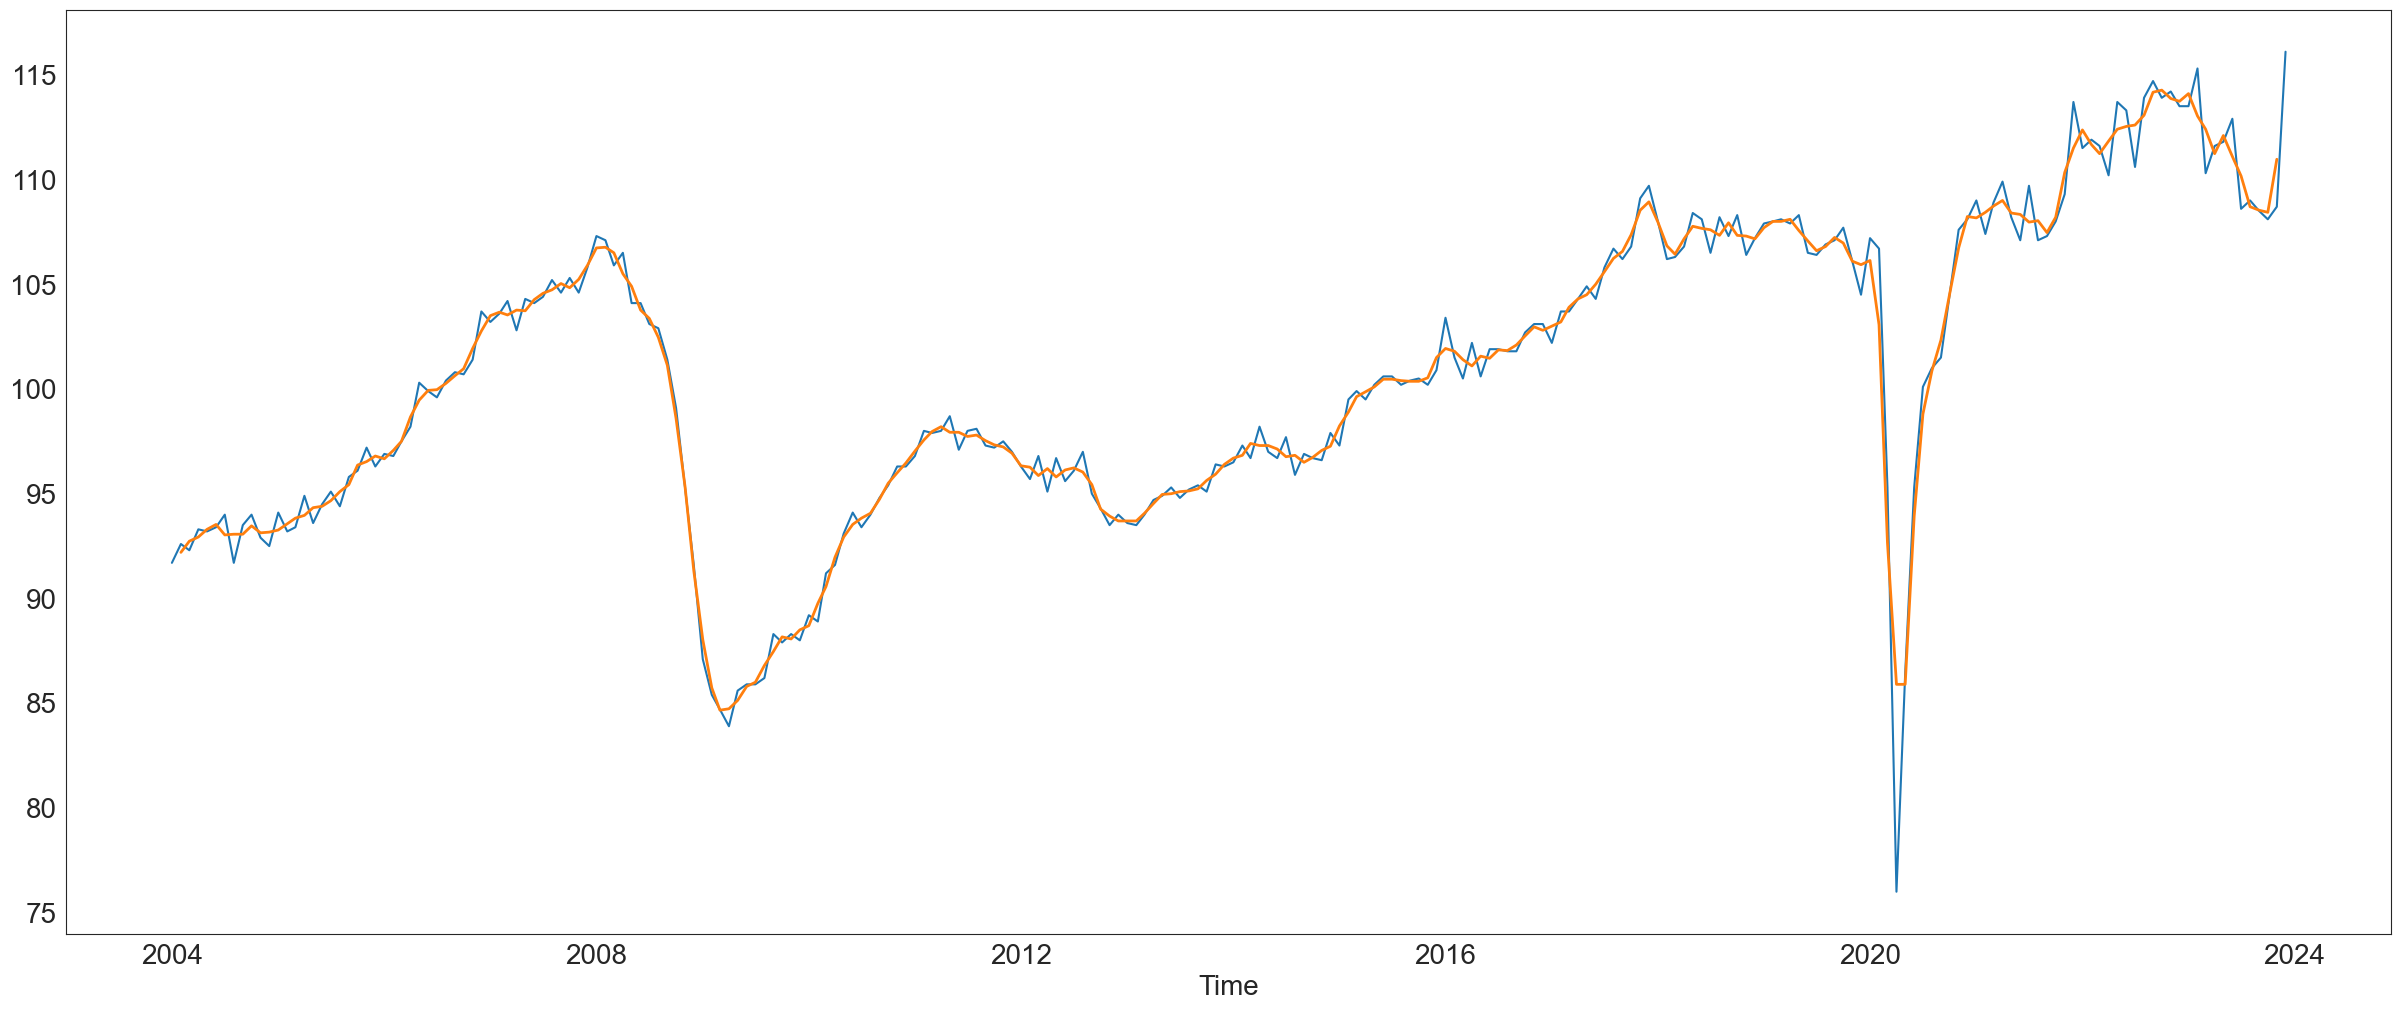

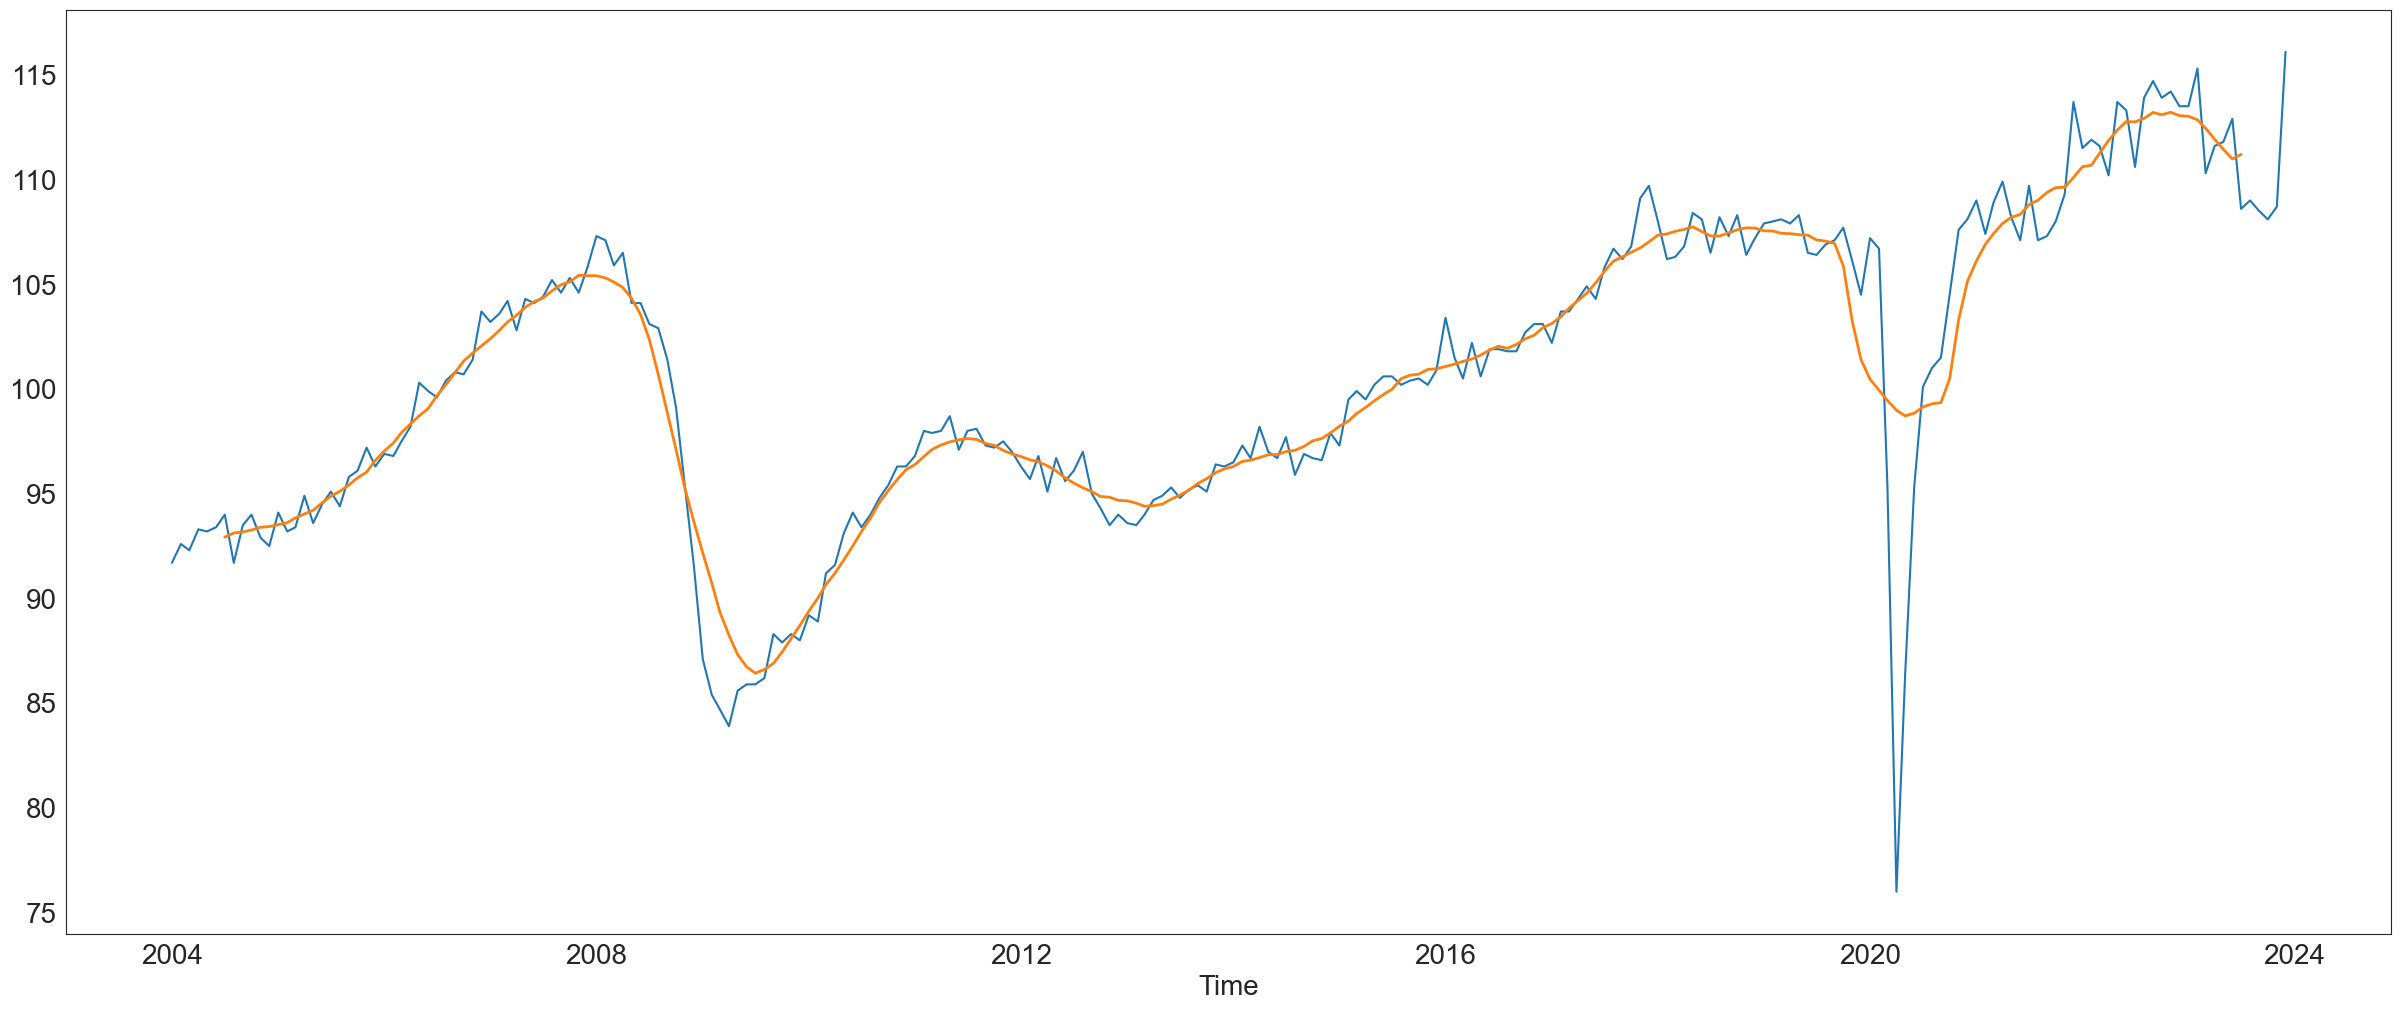

In [54]:
ax = plot_series(df, 'IP')
ax.plot(rolling_ip_q, linestyle='-', linewidth=2, label='Quarterly rolling mean - IP index')

ax = plot_series(df, 'IP')
ax.plot(rolling_ip_y, linestyle='-', linewidth=2, label='Annual rolling mean - IP index')

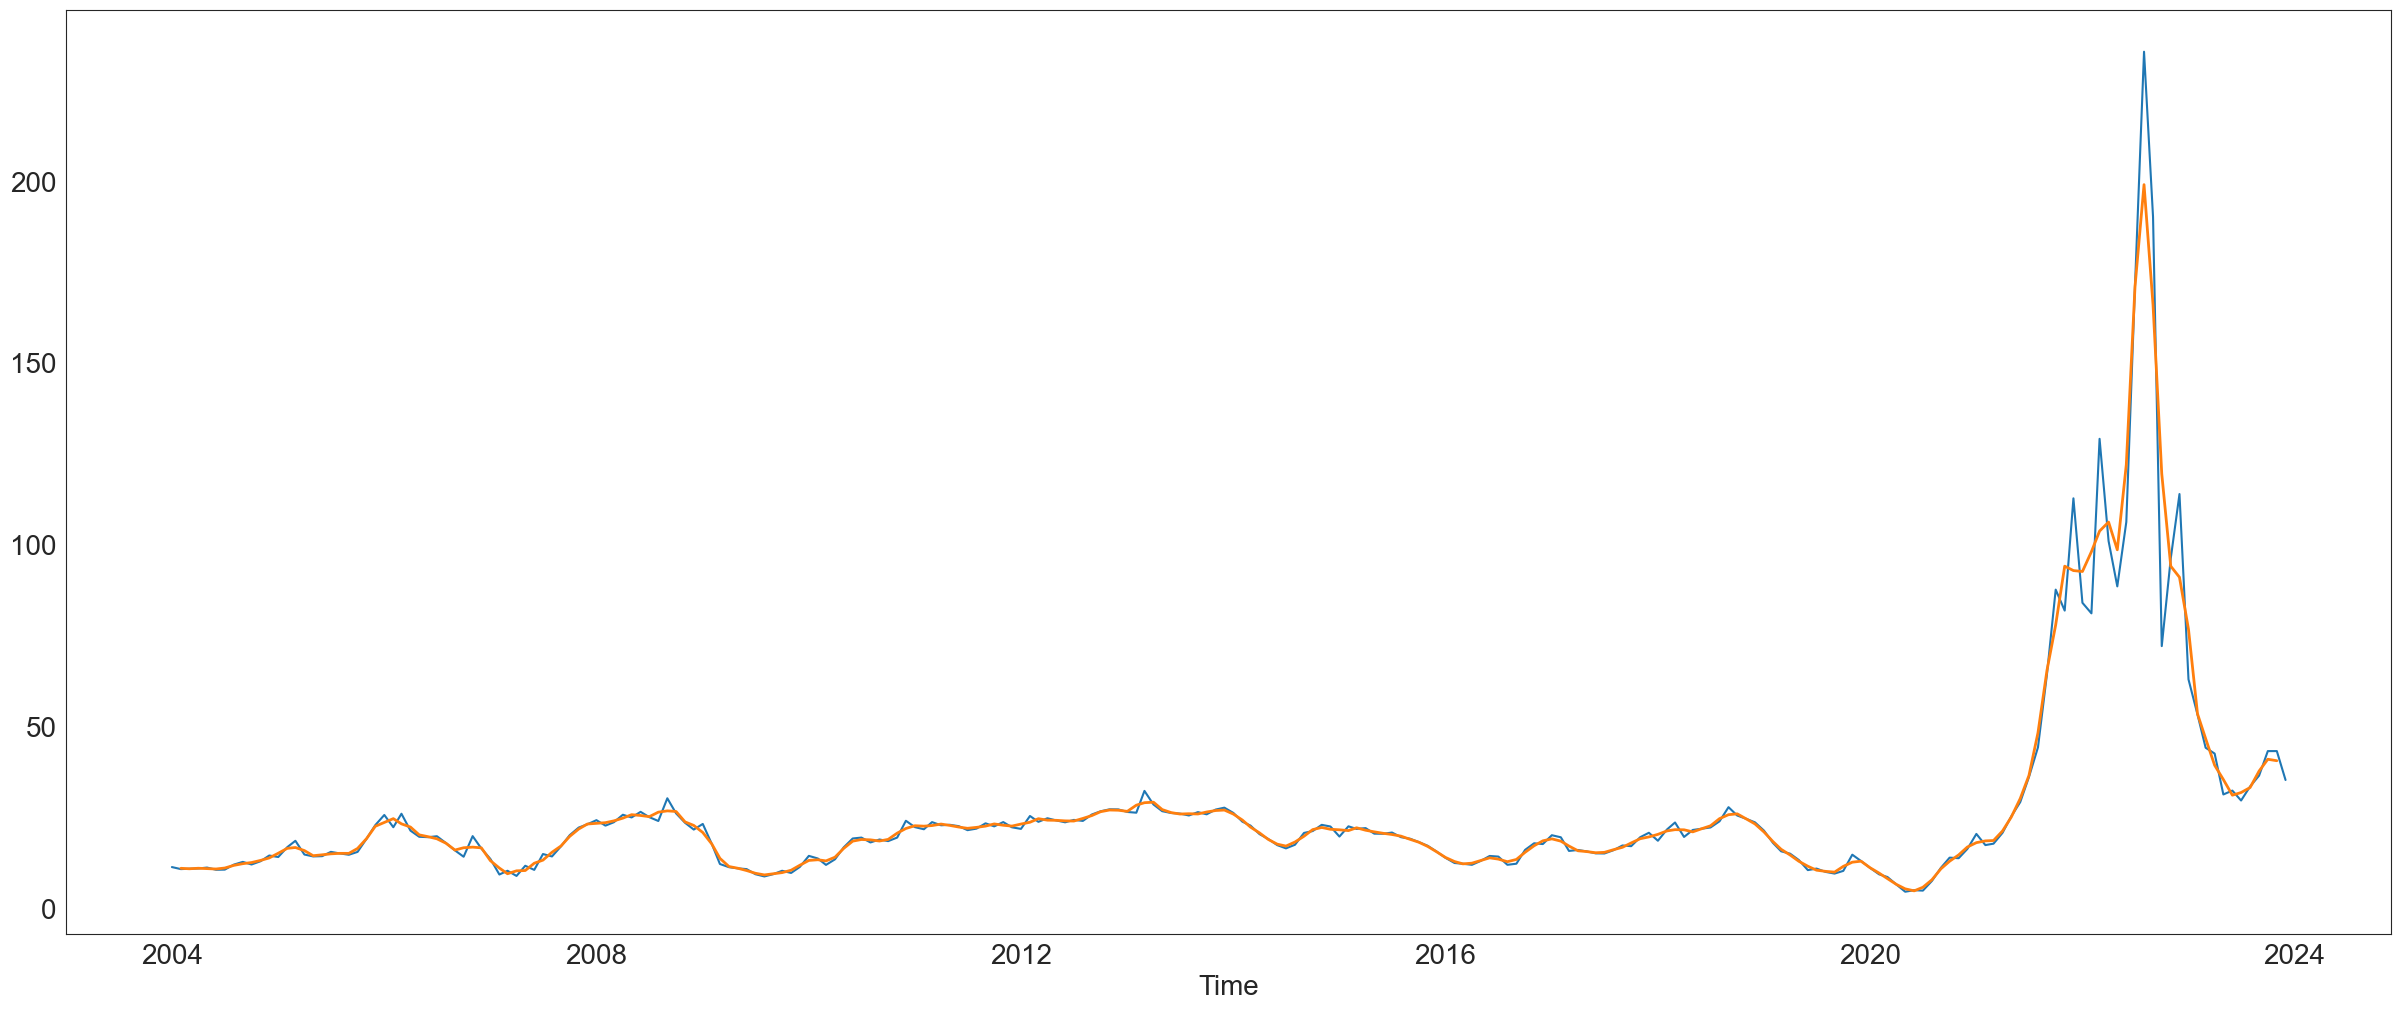

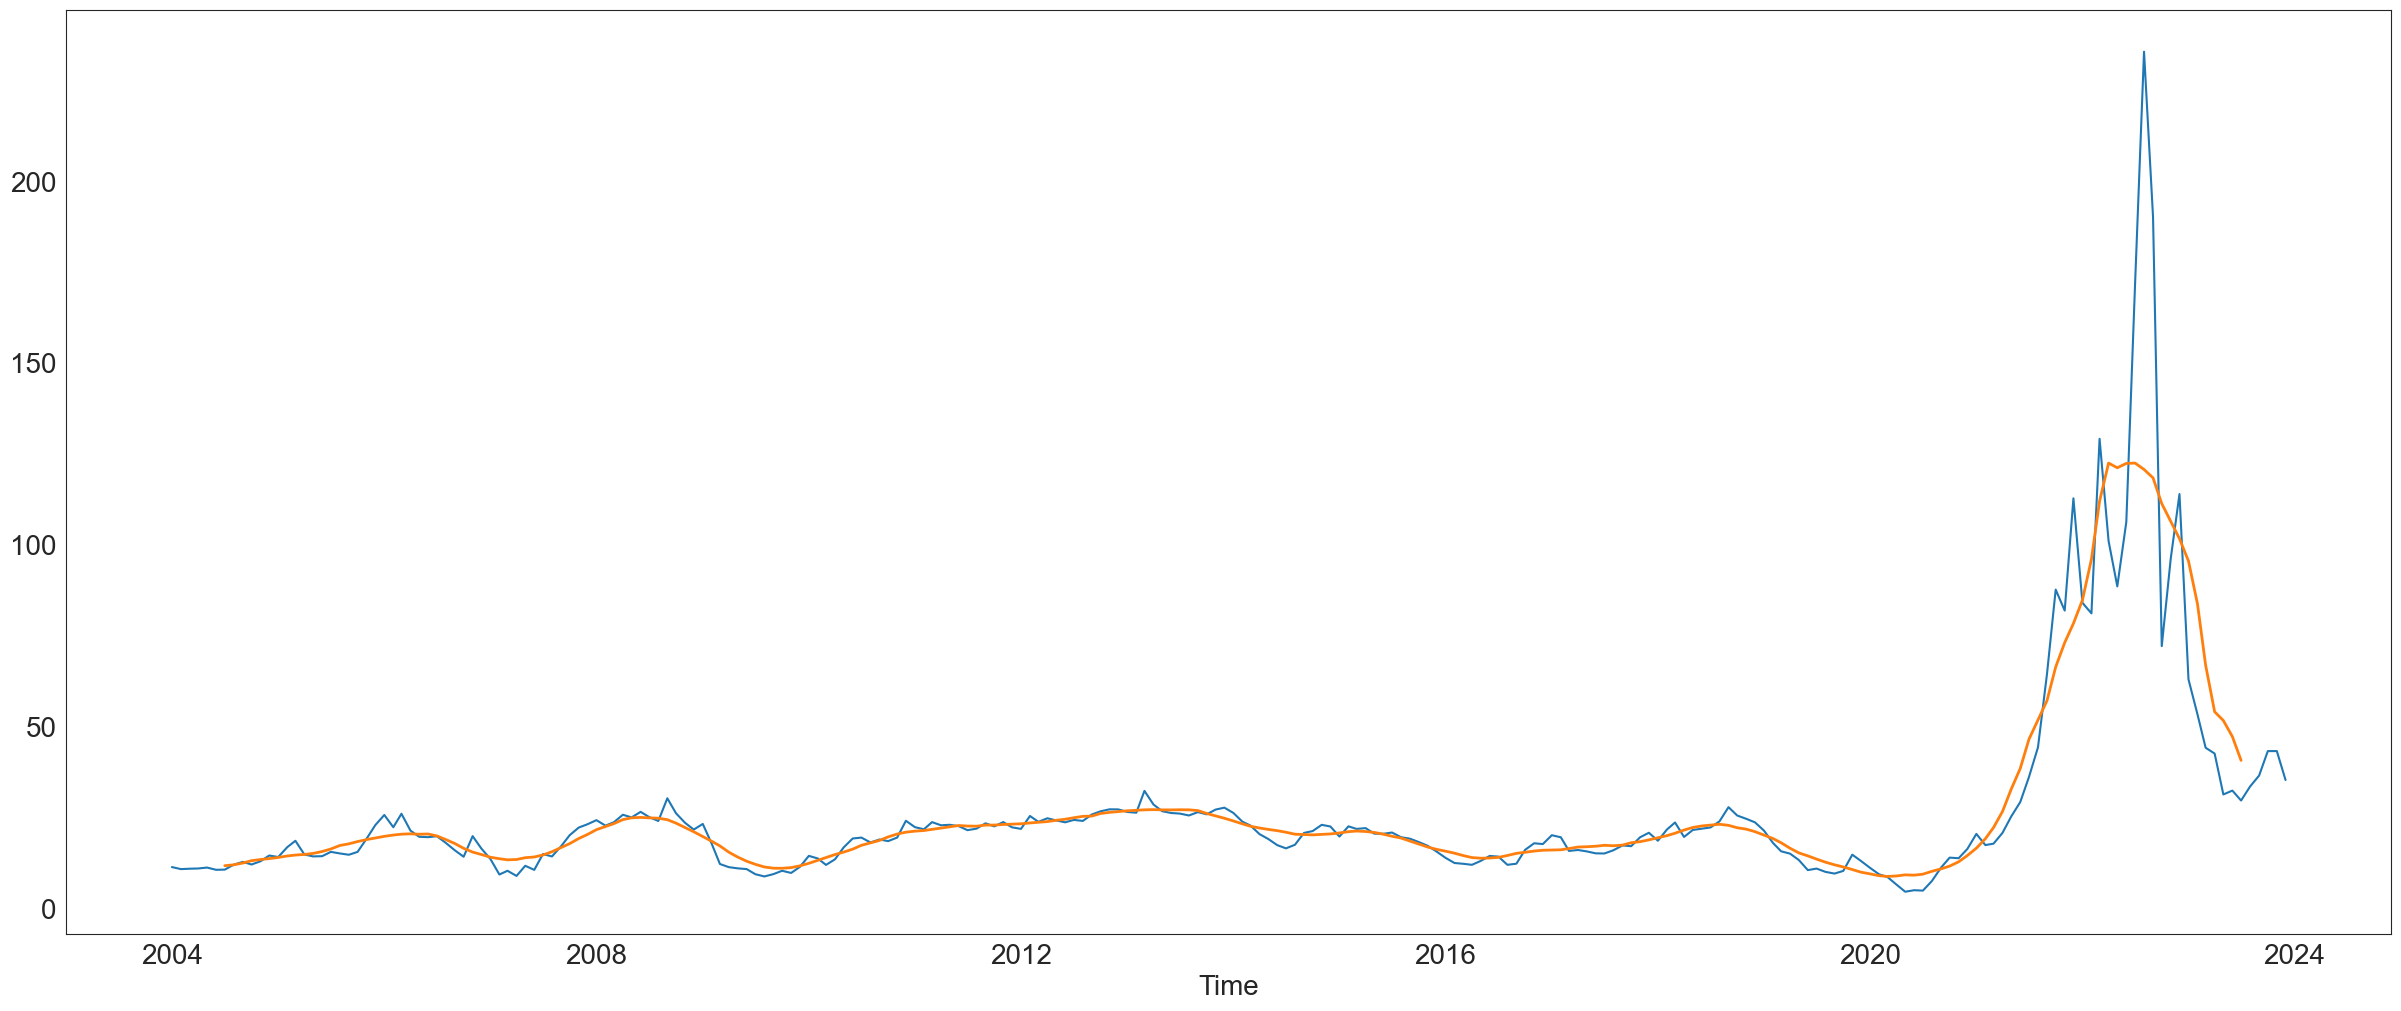

In [55]:
ax = plot_series(df, 'GAS_PRICE')
ax.plot(rolling_gp_q, linestyle='-', linewidth=2, label='Quarterly rolling mean - Gas Prices')

ax = plot_series(df, 'GAS_PRICE')
ax.plot(rolling_gp_y, linestyle='-', linewidth=2, label='Annual rolling mean - Gas Prieces')